# **Clasificación: Primeros pasos**

En este proyecto, analizaremos datos de una campaña de marketing para la adhesión a inversiones. El objetivo es utilizar la información de los datos para predecir si los clientes de un banco invertirán su dinero o no.  

Esta predicción se realizará mediante **machine learning**, y este notebook contendrá los pasos para obtener un modelo capaz de hacer dichas predicciones, desde la **lectura**, **análisis exploratorio**, **separación** y **transformación** de los datos, hasta el **ajuste**, **evaluación** y **comparación** de modelos de clasificación.

# 1. Análisis exploratorio

## Realizando la lectura de los datos

Podemos leer los datos utilizando la biblioteca `pandas`. Por esta razón, importaremos la biblioteca con el comando `import pandas as pd`.  

Dado que el archivo de datos está en formato *csv*, realizaremos la lectura con la función [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [4]:
import pandas as pd

In [5]:
datos = pd.read_csv('../data/marketing_inversiones.csv')

Para crear modelos de clasificación, necesitamos utilizar datos de calidad, sin inconsistencias y sin datos faltantes. Verificaremos si existen datos nulos y el tipo de datos de cada columna en la base de datos utilizando el método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [6]:
datos.head()

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si


In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  1268 non-null   int64 
 1   estado_civil          1268 non-null   object
 2   escolaridad           1268 non-null   object
 3   default               1268 non-null   object
 4   saldo                 1268 non-null   int64 
 5   prestatario           1268 non-null   object
 6   ultimo_contacto       1268 non-null   int64 
 7   ct_contactos          1268 non-null   int64 
 8   adherencia_inversion  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


In [8]:
datos.shape

(1268, 9)

## Explorando los datos

Una etapa muy importante en proyectos de *machine learning* es la exploración y comprensión de los datos, conocida como **análisis exploratorio**. Podemos utilizar gráficos para verificar qué información contiene cada una de las columnas de la base de datos, así como identificar inconsistencias y patrones que puedan existir.  

Exploraremos cada una de las columnas de la base de datos utilizando la biblioteca `plotly`. Comenzaremos con las variables categóricas y luego analizaremos las variables numéricas.

### Variables categóricas

In [9]:
import plotly.express as px

In [10]:
px.histogram(datos, x='adherencia_inversion', text_auto=True)

In [11]:
px.histogram(datos, x='estado_civil', text_auto=True, color='adherencia_inversion', barmode='group')

In [12]:
px.histogram(datos, x='escolaridad', text_auto=True, color='adherencia_inversion', barmode='group')

In [13]:
px.histogram(datos, x='default', text_auto=True, color='adherencia_inversion', barmode='group')

In [14]:
px.histogram(datos, x='prestatario', text_auto=True, color='adherencia_inversion', barmode='group')

### Variables numéricas

In [15]:
px.box(datos, x='edad', color='adherencia_inversion')

In [16]:
px.box(datos, x='saldo', color='adherencia_inversion')

In [17]:
px.box(datos, x='ultimo_contacto', color='adherencia_inversion')

In [18]:
px.box(datos, x='ct_contactos', color='adherencia_inversion')

# 2. Tranformación de los datos

## Variables explicativas y variable de respuesta

Para realizar la predicción de los valores con un modelo de aprendizaje automático, necesitamos separar la variable objetivo de las variables explicativas. La variable **y** representa lo que queremos predecir, mientras que **x** incluye todas las variables que se utilizarán para explicar el comportamiento de **y**.

In [19]:
datos

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si
...,...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6,si
1264,35,soltero (a),superior,no,5958,no,215,1,si
1265,30,soltero (a),superior,no,-477,si,1532,2,si
1266,42,casado (a),superior,no,2187,no,525,3,si


Tenemos las columnas: `edad`, `estado_civil`, `escolaridad`, `default`, `saldo`, `prestatario`, `ultimo_contacto` y `ct_contactos`. Estas variables son las que explicarán si la persona se adhirió o no al programa de inversión a través de la campaña de marketing.

Por lo tanto, debemos separar nuestro conjunto de datos en las variables explicativas y la variable respuesta. Nuestra variable respuesta es únicamente la adherencia a la inversión, mientras que nuestras variables explicativas son todas las demás.

Para lograr esto, generaremos nuestras variables explicativas utilizando una `X` mayúscula. Puedes definirla como prefieras, pero por convención se utiliza X mayúscula porque se trataría de una matriz.

In [20]:
X = datos.drop(columns=['adherencia_inversion'])

Nuestra variable de respuesta, `Y`, será simplemente la columna de adherencia a la inversión de los datos.

In [21]:
y = datos['adherencia_inversion']

In [22]:
X

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos
0,45,casado (a),superior,no,242,no,587,1
1,42,casado (a),secundaria,no,1289,no,250,4
2,23,soltero (a),superior,no,363,no,16,18
3,58,divorciado (a),superior,no,1382,no,700,1
4,50,casado (a),secundaria,no,3357,no,239,4
...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6
1264,35,soltero (a),superior,no,5958,no,215,1
1265,30,soltero (a),superior,no,-477,si,1532,2
1266,42,casado (a),superior,no,2187,no,525,3


In [23]:
y

0       si
1       si
2       no
3       si
4       si
        ..
1263    si
1264    si
1265    si
1266    si
1267    si
Name: adherencia_inversion, Length: 1268, dtype: object

## Transformando las variables explicativas

Los algoritmos de aprendizaje automático no comprenden datos en formato de texto, por lo que debemos transformar los datos a un formato numérico para que el algoritmo pueda interpretar la información. Esta transformación debe realizarse de manera que no altere la información original del conjunto de datos, por lo que no basta con simplemente cambiar los valores a números aleatorios.

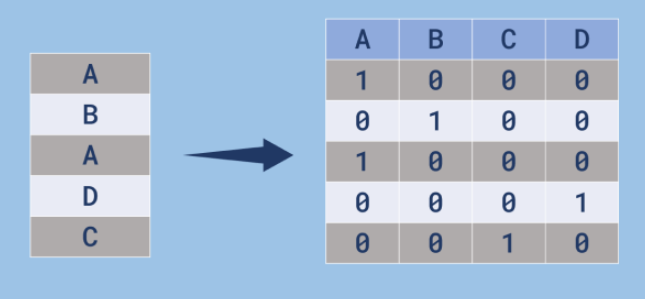

No podemos simplemente asignar que casado es 1, soltero es 2 y divorciado es 3, porque indirectamente estaríamos atribuyendo mayor peso a divorciado por valer 3. Así, el modelo categorizaría automáticamente que divorciado es una variable de mayor peso. Por eso, no podemos simplemente asignar valores numéricos a estas variables.

Lo mismo ocurre con la escolaridad: superior, secundaria, primaria. Aunque existe una cierta jerarquía, lo mejor es no asignar un peso específico, ya que podría sesgar nuestro modelo. También tenemos algunas categorías binarias, como default, que puede ser sí o no, y prestatario, que también sería sí o no. Las otras dos son numéricas.

Para abordar esto, vamos a utilizar el método de One-Hot Encoding, que consiste en asignar el valor de 1 a una característica y 0 a los demás valores. Por ejemplo, colocaríamos en columnas el valor casado en A, soltero en B, divorciado en C, y en D para "no hay respuesta".

In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder 

In [25]:
columnas = X.columns

Ahora, ejecutaremos esto y crearemos nuestro modelo, al que llamaremos `one_hot`, directamente de `OneHotEncoder`. Utilizaremos `make_column_transformer`, que recibe los siguientes parámetros: primero, una tupla, que pasaremos directamente como tal.

En esta tupla, vamos a colocar el modelo que queremos instanciar para hacer esta codificación. Para ello, utilizamos el `OneHotEncoder`. Sin embargo, no queremos aplicar el modelo `OneHotEncoder` a todas las columnas, sino que deseamos ignorar los casos en los que la columna es binaria, como es el caso de `default` y `prestatario`.

Debemos especificar esto para evitar llenar de ceros y unos innecesariamente. Para ello, especificamos `drop='if_binary'`.

Pasamos este parámetro y, después, en una lista, indicamos directamente los valores de las columnas que queremos. Las columnas son `estado_civil`, `escolaridad`, `default` y `prestatario`. Las otras son numéricas. Entonces, serían `estado_civil`, `escolaridad`, `default` y `prestatario`. Perfecto. Ya tenemos nuestro segundo elemento de la tupla.

Ahora viene nuestro tercer elemento. Cuando estamos instanciando nuestro `make_column_transformer`, debemos especificar qué hacer con el resto de las columnas. Indicamos `remainder='passthrough'` para que las omita. Así, se salta las columnas restantes.

También colocamos el siguiente parámetro, que nos permite determinar si queremos una matriz esparza, es decir, llenar de ceros y algunos valores de uno. Esto simplifica el número, pero podría quitar información relevante. Por lo tanto, establecemos `sparse_threshold=0` para garantizar que nuestro modelo no elimine información relevante.

Por último, se implementó recientemente en el `make_column_transformer` el parámetro `force_int_remainder_columns`. Esto significa que obliga a cambiar a entero el nombre de la columna, pero nosotros queremos que mantenga el nombre original.

Por lo tanto, establecemos `force_int_remainder_columns=False`. En futuras versiones de este módulo, esto cambiará y será falso por defecto.

In [26]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'), 
                                   ['estado_civil', 'escolaridad', 'default', 'prestatario']), remainder='passthrough', sparse_threshold=0)

Ahora vamos a cambiar nuestra `X` y transformarla directamente con OneHot. Realizamos el `fit_transform` para ajustar nuestro modelo: `fit_transform(X)`. Aquí estamos aplicando a nuestra `X`, que son nuestras variables explicativas, toda esta transformación.

In [27]:
X = one_hot.fit_transform(X)

In [28]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_soltero (a)',
       'onehotencoder__escolaridad_primaria',
       'onehotencoder__escolaridad_secundaria',
       'onehotencoder__escolaridad_superior', 'onehotencoder__default_si',
       'onehotencoder__prestatario_si', 'remainder__edad',
       'remainder__saldo', 'remainder__ultimo_contacto',
       'remainder__ct_contactos'], dtype=object)

El modelo asignó simplemente 1 para "Sí" y 0 para "No". Las columnas restantes, que no requirieron transformación numérica, quedaron intactas: `saldo`, `ultimo_contacto` y `ct_contactos`. De esta manera, ya tenemos la transformación necesaria para nuestras variables explicativas.

In [29]:
X

array([[ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.420e+02,  5.870e+02,
         1.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  1.289e+03,  2.500e+02,
         4.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  3.630e+02,  1.600e+01,
         1.800e+01],
       ...,
       [ 0.000e+00,  0.000e+00,  1.000e+00, ..., -4.770e+02,  1.532e+03,
         2.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.187e+03,  5.250e+02,
         3.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  1.900e+01,  1.100e+02,
         2.000e+00]], shape=(1268, 12))

In [30]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_soltero (a),onehotencoder__escolaridad_primaria,onehotencoder__escolaridad_secundaria,onehotencoder__escolaridad_superior,onehotencoder__default_si,onehotencoder__prestatario_si,remainder__edad,remainder__saldo,remainder__ultimo_contacto,remainder__ct_contactos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


## Transformando la variable respuesta

Así como las variables explicativas, la variable objetivo también debe convertirse al formato numérico. Podemos representar una variable objetivo binaria como 0 o 1, donde 0 indica la ausencia de la característica de la variable y 1 representa su presencia.

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder = LabelEncoder()

In [33]:
y = label_encoder.fit_transform(y)

In [34]:
y

array([1, 1, 0, ..., 1, 1, 1], shape=(1268,))

# 3 Ajustando modelos

Posteriormente, realizamos una transformación a nuestras variables explicativas y a nuestra variable de respuesta. Ahora tenemos nuestros datos completamente codificados en formatos de array para poder implementarlos en nuestro modelo de *Machine Learning*.

Sin embargo, antes de poder ajustar un modelo de *Machine Learning*, es necesario que segmentemos nuestra base en dos partes: una base para entrenamiento y otra para prueba.

¿Qué queremos decir con ello? En el entrenamiento, debemos mostrarle a nuestro modelo, a través de las variables explicativas, cuál será la respuesta durante su ejecución. En un aprendizaje utilizando clasificación, estamos enseñándole la salida al modelo, lo que significa que es una forma de aprendizaje automático supervisado. El modelo está viendo la salida.

Un modelo de clasificación permite ver la salida durante el entrenamiento. En nuestra base de entrenamiento, el modelo siempre estará viendo la salida para poder generalizar. Por ejemplo, con ciertas características y variables explicativas, la salida es 1; con otras, es 0.

El modelo tratará de hallar patrones dentro de las diversas combinaciones de características explicativas que puedan justificar esa respuesta. La idea de entrenar ese modelo es poder probarlo después con datos que nunca haya visto, para verificar si está generalizando bien o no.

## Dividiendo los datos entre entrenamiento y prueba

Para comprender si el modelo realmente está aprendiendo de los datos, necesitamos hacer una separación de los datos entre entrenamiento y prueba. Los datos de **entrenamiento** se utilizan para ajustar el modelo, mientras que los datos de **prueba** sirven para verificar el aprendizaje del modelo en datos que no fueron utilizados en el momento del ajuste.

<a href="https://ibb.co/2749Chh3"><img src="https://i.ibb.co/Y7sC1QQB/train-test.png" alt="train-test" border="0"></a>

En la imagen, en la parte superior, tenemos nuestro conjunto de datos. Este conjunto lo vamos a dividir en un porcentaje para entrenamiento y otro para prueba.

Para ello, importaremos los módulos que nos permiten realizar esta tarea: `from sklearn.model_selection import train_test_split`. Este módulo, `train_test_split`, nos permite hacer la separación para entrenamiento (train) y para prueba (test).

In [35]:
from sklearn.model_selection import train_test_split

El siguiente paso es separar nuestros arrays, tanto de las variables explicativas como de la variable respuesta, en base de entrenamiento y base de prueba.

Por lo tanto, son cuatro variables: la primera es `X_train`, la segunda es `X_test`, la tercera es `y_train` y la cuarta es `y_test`, en ese orden. `X` de entrenamiento, `X` de prueba, `y` de entrenamiento y `y` de prueba.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=5)

Cuando realizamos la transformación de nuestras variables explicativas y de nuestra variable respuesta, obtenemos *arrays*. Nuestro *array* será `X`, que contendrá todas las variables explicativas y las variables de respuesta.

El siguiente paso es definir qué porcentaje de la base queremos para pruebas. Por defecto, si revisamos los parámetros, para prueba está configurado al 25%. Sabemos que entrenaremos con el 75% y el 25% lo dejaremos para pruebas.

También existe un parámetro llamado `random_state`, que es el estado de aleatoriedad, el cual nos permitirá controlar y reproducir la misma separación al entrenar, por ejemplo, otros modelos. Es importante especificar siempre este parámetro.

Existe un parámetro adicional llamado `stratify`, que nos permite estratificar nuestra base de modo que la cantidad de observaciones sea similar tanto en la base de prueba como en la base de entrenamiento de la variable de respuesta.

Es decir, si en el 75% de nuestras muestras para entrenar tenemos un 30% de observaciones negativas y un 70% positivas, deseamos que en el 25% de nuestra base de prueba también haya un 30% de observaciones negativas y un 70% positivas. Especificamos el array que deseamos dejar, por lo tanto, `stratify` igual a y, que sería el *array* de la salida.

De esta manera, garantizamos que tanto en la base de entrenamiento como en la base de prueba tengamos la misma proporción de observaciones, tanto de sí como de no. La misma proporción de salida de 1 y de 0 en ambos casos.

El `random_state` lo dejaremos en 5, aunque se puede colocar el número que se desee.

## Modelo de referencia - Baseline

Ya tenemos nuestra base segmentada en una base para prueba y una base para entrenamiento. El siguiente paso es generar un modelo de referencia o una baseline (línea base) que nos permita tener un criterio de comparación con respecto a modelos más avanzados y verificar si estamos entrenando modelos que generalicen mejor que este modelo de referencia.

Para ello, la manera más simple de generar este modelo de referencia es utilizando un `DummyClassifier` que, como su nombre lo indica, es un clasificador básico.

Con este clasificador sencillo, básicamente lo que hace es atribuir valores, dando una clasificación a la categoría que tenga mayor frecuencia, por ejemplo. Es la manera de poder tener una referencia con un clasificador sencillo para ver cómo los demás modelos se están comportando o cómo están generalizando.

El modelo más simple de clasificar los datos es simplemente utilizar un algoritmo que asigna todas las clasificaciones a la clase que tiene mayor frecuencia. Este algoritmo sirve como un criterio de comparación para identificar si los otros modelos tienen un rendimiento mejor que la clasificación más simple posible.

In [37]:
from sklearn.dummy import DummyClassifier

In [38]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.6025236593059937

*¿Qué quiere decir esto?* Que el 60% de las veces clasificó correctamente con este modelo. Lo cual, al principio, podría parecer bien. Sin embargo, para este caso, no es así. *¿Por qué?* Porque simplemente está asignando todas las clasificaciones a la clase que tiene mayor frecuencia. Sucede que la clase con mayor frecuencia es "no", entonces la mayoría de las veces dice que es "no", y por eso llegamos a ese valor.

Sin embargo, es necesario crear este modelo de referencia para, a partir de allí, tener un criterio de comparación con los diversos modelos de Machine Learning (aprendizaje automático) y entender cuál de ellos está generalizando mejor.

## Árboles de Decisión

El modelo de árbol de decisión es muy utilizado debido a su alta **explicabilidad** y **procesamiento rápido**, manteniendo un rendimiento bastante interesante.

Se basa en decisiones simples tomadas por el algoritmo, separando los datos mediante comparaciones de **menor** y **mayor** en los valores de las columnas de la base de datos.

**¿Cómo puede determinar ello?**

Lo hace a través del índice de Gini que calcula qué tan mezcladas están nuestras clases. No voy a entrar en la elaboración o la resolución matemática del algoritmo de Gini porque es bastante compleja. Sin embargo, la idea principal de este algoritmo es evaluar qué tan mezcladas están estas clases.

Entonces varía de 0 a 1, donde 0 quiere decir que está perfectamente separada una clase de la otra y 1 completamente mezclado. Entonces 1, imagínate la imagen de las manzanas que coloqué al principio con las peras todo mezclado y 0 ya segmentado perfectamente. Las manzanas de un lado y las peras del otro lado, ¿ok?

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [41]:
modelo_arbol.score(X_test, y_test)

0.6656151419558359

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [43]:
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']

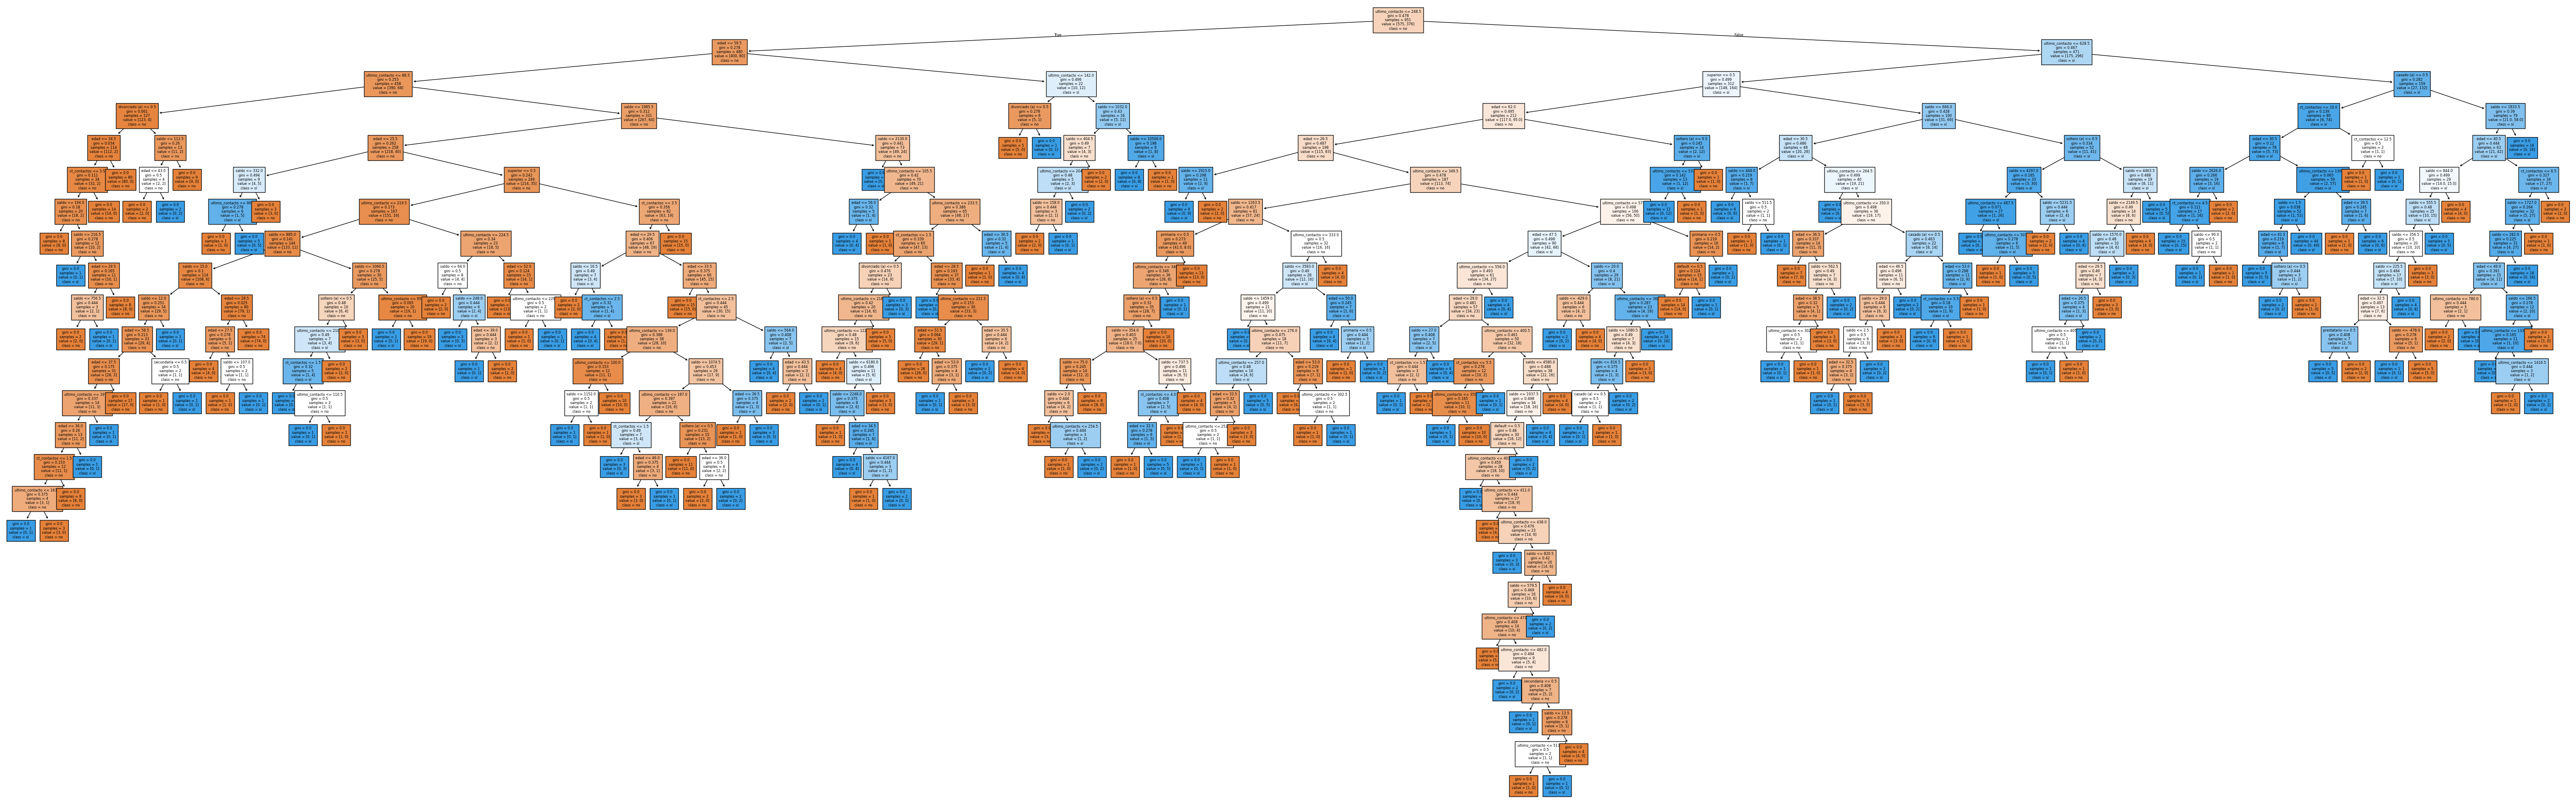

In [44]:
plt.figure(figsize=(80, 25))
plot_tree(modelo_arbol, filled=True, class_names=['no', 'sí'], fontsize=6, feature_names=valores_columnas);

Cuando la respuesta es no, el color tiende a naranja. Cuando es sí, el color tiende a azul. Por eso es importante.

Nuestro algoritmo determinó que "último contacto" es el mejor atributo para comenzar a dividir nuestro conjunto de datos. Cuando el valor es menor o igual a 248 días, si es menor o igual a 248 días desde el último contacto, se va a ir por el lado izquierdo, que sería verdadero. Si es mayor que ese tiempo, va a ir hacia el lado derecho, que sería falso, ¿de acuerdo?

El coeficiente de Gini es 0.478. Recuerda que la idea es llevar este Gini lo más cercano a cero posible. De todas las posibles combinaciones, nuestro algoritmo encontró que el menor valor de Gini para hacer esta primera bifurcación era de 0.478, ¿de acuerdo? Las muestras que tomó para entrenamiento fueron 951. De estas, 575 se fueron por un camino y 376 por el otro. En este caso, la clase es no, ¿de acuerdo?

Vamos al lado izquierdo, al lado verdadero. Después, tomó la edad. Si es menor o igual a 59.5 años, va para el lado izquierdo, que es verdadero. Para el lado derecho, que es falso, si fue para el lado izquierdo, entonces observas "último contacto" menor o igual a 86.5 días.

Nota que va tomando de forma iterativa todas las columnas y va descendiendo, haciendo todas estas preguntas hasta llegar a cero. Cuando Gini es 0, significa que clasificó perfectamente bien esta muestra de que no va a tomar el préstamo, sino la oferta para adherirse al plan de inversión. Y este cliente que sí va a tomar la oferta para adherirse al plan de inversión.

In [45]:
modelo_arbol.score(X_train, y_train)

1.0

Estuvimos analizando nuestro árbol de decisión e instanciamos un modelo sin ningún parámetro. No delimitamos la profundidad, lo que provocó que la ejecución se demorara varios segundos, a pesar de que solo teníamos mil observaciones.

En el caso de Big Data, estamos hablando de millones de líneas o cientos de miles de líneas para entrenar un modelo, por lo que no sería eficiente realizar este modelado sin parametrizar de manera más inteligente nuestro modelo.

In [46]:
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [47]:
modelo_arbol.score(X_test, y_test)

0.7160883280757098

Procederemos a calcular el puntaje con modelo.score, utilizando X_test e y_test. ¿Qué sucedió? Nuestro modelo obtuvo un mejor resultado: 71 contra 66. Esto indica que, en el primer caso, nuestro modelo se sobreajustó, es decir, se adaptó perfectamente a todas las observaciones, lo que resultó en un sobreajuste.

¿Cuál es el problema de dejar un modelo sobreajustado? Que no predecirá de la mejor forma los datos futuros, ya que memorizó perfectamente todas las observaciones y no está preparado para recibir nuevas observaciones.

Estamos ante un problema de sobreajuste o *overfitting*. Vamos a dejar una actividad en el entrenamiento que aborda el *overfitting* y su opuesto, el *underfitting* o subajuste, que ocurre cuando el modelo definitivamente no generaliza. Tenemos, por lo tanto, estos dos casos.

Para este caso en particular, observamos que obtuvimos un resultado interesante. Vamos a graficar nuestro modelo nuevamente, pero cambiaremos algunos parámetros.

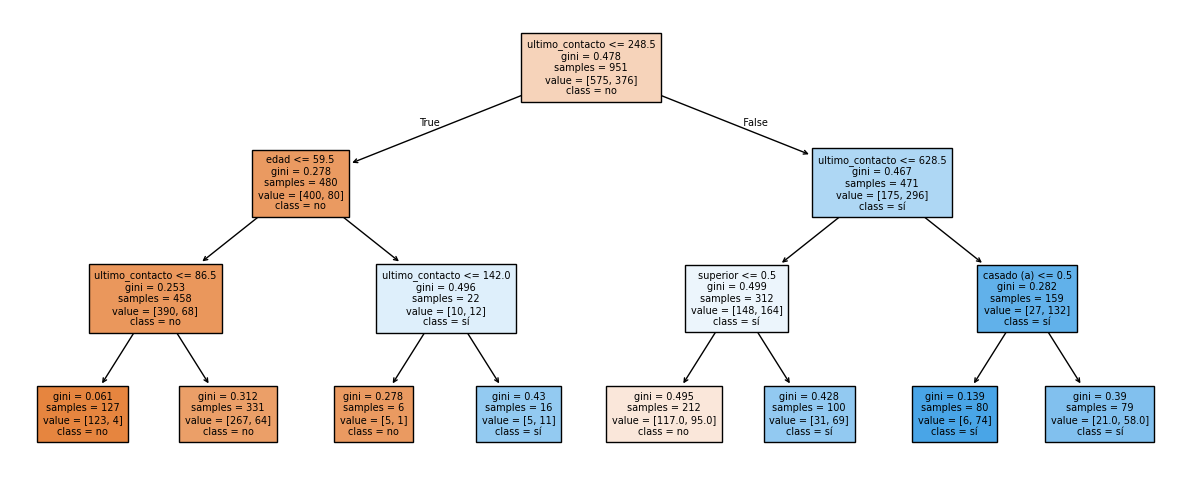

In [48]:
plt.figure(figsize=(15, 6))
plot_tree(modelo_arbol, filled=True, class_names=['no', 'sí'], fontsize=7, feature_names=valores_columnas);

In [49]:
modelo_arbol.score(X_train, y_train)

0.7613038906414301

Podemos ver nuevamente el puntaje de nuestro árbol con el entrenamiento. Vamos a pegarlo aquí, sustituyendo con X_train e y_train. Observamos que al momento de entrenar nuestro árbol, alcanzó un 76% y generalizó con un 71%.

De esta manera, simplemente ajustando la profundidad a 3 niveles, logramos obtener un resultado interesante que superó nuestra línea base y también nuestro árbol sin ningún tipo de parametrización.

# 4. Selección de modelos

Ya hemos instanciado dos modelos: nuestra línea base, un *DummyClassifier*, y también un Árbol de Decisión. Sin embargo, ¿será el Árbol de Decisión suficiente? No hemos experimentado, por ejemplo, con otro modelo. Para avanzar, es necesario considerar algunos aspectos.

En el caso de los Árboles de Decisión, no es necesario llevar los valores a una misma escala, ya que el Árbol de Decisión toma sus determinaciones comparando los valores dentro de la misma columna. Por lo tanto, no es necesario unificar la escala, ya que todos los valores se miden, por así decirlo, con la misma escala.

Sin embargo, hay modelos en los que el análisis es diferente. El algoritmo realiza su análisis de manera distinta y es necesario que llevemos nuestros valores a una misma escala para evitar que algunas variables, debido a su magnitud, tengan más peso que otras.

Si consideramos, por ejemplo, dos de nuestras variables explicativas, como la edad y el saldo, estas tienen magnitudes muy diferentes.

El orden de su valor es muy grande en el caso de los saldos, mientras que para la edad es mucho más limitado. La edad de un cliente puede llegar, como máximo, a los 100 años, pero el saldo de un cliente puede alcanzar millones de dólares.

¿Qué queremos decir con esto? Que la edad puede, en algún momento, no tener ninguna relevancia porque la magnitud de su valor es muy inferior al saldo, que puede tener una magnitud mucho superior. Para ello, lo que podemos hacer es normalizar nuestros valores, es decir, llevarlos a una escala entre 0 y 1. Una de las maneras de hacerlo es con el `MinMaxScaler`.

## Normalizando los datos

Algunos algoritmos pueden asignar un mayor peso a los valores de las variables debido a la escala de los valores y no por la importancia de la clasificación de la variable objetivo. Por ejemplo, en una base de datos con las columnas **edad** y **salario**, el algoritmo puede dar un mayor peso de decisión a los valores del salario simplemente por estar en una escala mayor que los valores de la edad, y no porque la variable salario sea más importante que la variable edad.

En estos casos, necesitamos realizar una transformación en los datos para que estén en una misma escala, evitando que el algoritmo sea influenciado incorrectamente por los valores numéricos divergentes entre las variables.

$$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

Al hacer la normalización, dejamos todo en la misma escala para que ninguna variable explicativa tenga mayor relevancia sobre la variable de respuesta de la que debe tener. Para ello, importamos **MinMaxScaler**.

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
normalizacion = MinMaxScaler()

X_train_normalizado = normalizacion.fit_transform(X_train)

In [52]:
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176471,0.042810,0.023878,0.000000


Observamos que nuestra matriz, en el formato ya de *DataFrame*, queda normalizada con valores entre 0 y 1. ¿Qué significa esto? Que ninguna variable va a tener más relevancia que otra, sino que todas van a ser medidas con la misma regla.

## KNN

Ya tenemos nuestra X de entrenamiento normalizada y ahora podemos introducir un nuevo modelo, que sería el algoritmo KNN. El algoritmo KNN básicamente identifica los vecinos más cercanos al punto de consulta. El punto de consulta sería la variable de respuesta.

KNN, K-Nearest Neighbors (K-Vecinos Más Cercanos). Mide la distancia de cada una de estas observaciones.

---

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier()

In [55]:
knn.fit(X_train_normalizado, y_train)

KNeighborsClassifier()

Realizamos la instancia de nuestro modelo y lo siguiente es ponerlo a prueba. Para ello, también debemos realizar la transformación de nuestra `X` de prueba, que sería `X_test_normalizado`, igual a `normalizacion.transform(X_test)`. Transformamos la `X` de prueba y calculamos el puntaje de exactitud con `knn.score`, utilizando `X_test_normalizado` y `Y_test`.

In [56]:
X_test_normalizado = normalizacion.transform(X_test)

In [57]:
knn.score(X_test_normalizado, y_test)

0.6876971608832808

## Escogiendo y serializando el mejor modelo

Ya hemos desarrollado tres modelos: el modelo Dummy, el modelo de árbol y el modelo KNN. Ahora procederemos a compararlos para determinar cuál es el mejor modelo, de modo que podamos serializarlo y utilizarlo en el futuro con diversos clientes para prever si se adherirán al plan de inversiones.

---

Al final de un proyecto de machine learning, debemos comparar los resultados de los modelos y elegir el que tenga el mejor rendimiento.

Podemos almacenar el modelo en un archivo serializado del tipo pickle para que sea utilizado en producción, es decir, en datos del mundo real para atender las necesidades del problema que necesita ser resuelto.

---

Hemos creado previamente una lista de tuplas que contiene el modelo, el nombre del modelo y la `X` de entrenamiento. ¿Cuál es el objetivo de esta lista? Permitirnos realizar la siguiente iteración: para cada elemento en la lista, imprimiremos la exactitud del modelo.

In [58]:
lista = [('dummy', dummy, X_test), ('de árbol', modelo_arbol, X_test), ('knn', knn, X_test_normalizado)]

In [59]:
for i in lista:
    print(f'La exactitud del modelo {i[0]}: {i[1].score(i[2], y_test)}')

La exactitud del modelo dummy: 0.6025236593059937
La exactitud del modelo de árbol: 0.7160883280757098
La exactitud del modelo knn: 0.6876971608832808


Al ejecutar el código, obtenemos los siguientes resultados: la exactitud del modelo Dummy es del 60%, la del modelo de árbol es del 71%, y la del modelo KNN es del 68%. En este caso, el modelo de árbol obtuvo el mejor puntaje.

Sin embargo, esto no implica que siempre será mejor que el modelo KNN, ya que cada caso es particular. Para este caso específico, el modelo de árbol tuvo un mejor desempeño, por lo que procederemos a exportarlo.

Para exportarlo, utilizaremos la biblioteca Pickle, que nos permite crear archivos binarios. Este archivo binario contendrá nuestro modelo de Machine Learning serializado, listo para su uso.

In [60]:
import pickle

Nombramos este modelo como ModeloOneHotEncoder y le damos la extensión Pickle. Se puede usar cualquier extensión, siempre que sea diferente a las convencionales.

Especificamos "WB" para indicar Write Binary y lo llamamos as archivo. Al abrirlo, utilizamos pickle.dump para volcar nuestro OneHot, que fue el nombre de la variable utilizada en la transformación.

In [61]:
with open('../mod/modelo_onehotencoder.pkl', 'wb') as archivo:
    pickle.dump(one_hot, archivo)

Generalmente, cuando trabajamos con varios modelos de Machine Learning, el que está en producción se llama Champion, es como la convención. Creamos nuestro OneHotEncoder y nuestro modelo Champion, tenemos nuestros dos modelos, y ahora podemos recordar cómo eran nuestros datos.

In [62]:
with open('../mod/modelo_champion.pkl', 'wb') as archivo:
    pickle.dump(modelo_arbol, archivo)

In [63]:
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}

Tenemos un cliente que tiene 45 años, soltero, con escolaridad universitaria, superior. No es default, es decir, no es mala paga. Tiene un saldo de $23,040 dólares, no es prestatario, es decir, no ha sacado préstamos.

El último contacto fue hace 800 días, y la cantidad de contactos es de cuatro, es decir, hace casi dos años y medio que se le contactó por última vez. Ya tenemos estas características de este cliente.

Lo que haremos es traer nuestros modelos. Entonces, `modeloOneHot` será igual a `pd.read_pickle`. Podemos también leer el pickle con pandas, y vamos a traer primero nuestro modelo *OneHot*, que fue el que copiamos allí.

In [64]:
nuevo_dato = pd.DataFrame(nuevo_dato)
nuevo_dato

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos
0,45,soltero (a),superior,no,23040,no,800,4


In [65]:
modelo_onehot = pd.read_pickle('../mod/modelo_onehotencoder.pkl')
modelo_arbol = pd.read_pickle('../mod/modelo_champion.pkl')

Lo que haremos es `nuevo_dato` es igual a `modelo_onehot.transform()`, y él recibe, lógicamente, como parámetro, el *DataFrame* `nuevo_dato`. Hacemos eso, y hacemos el `predict` de nuestro modelo de árbol con el nuevo dato.

In [66]:
nuevo_dato = modelo_onehot.transform(nuevo_dato)

In [67]:
modelo_arbol.predict(nuevo_dato)

array([1])

Nuestro cliente, con estas características que acabamos de introducir, tiene una previsión del 70% de que va a adherirse al plan de inversiones.